# **live 016**

## **Os principais modelos de negócio**

### **e-commerce**

    faturamento é dado pelas vendas de um produto 
        - rener, riachuelo, submarino, magalu

### **software as a service - saas**

    faturamento proveniente de uma assinatura de utilização
        - gmail, salesforce, looker, asana

### **services**

    faturamento origina das vendas de um projeto, de tempo ou prestação de serviço
        - sulamérica, porto seguro, mapfre

### **mobile app**

    faturamento através da compra in-app
        - wildlife, ubisoft, mobile games

### **media site**

    faturamento pelo número de clicks ou views em um determinado anúncio
        - facebook, google, uol, g1, etc

## **algoritmo\contexto de negócio**

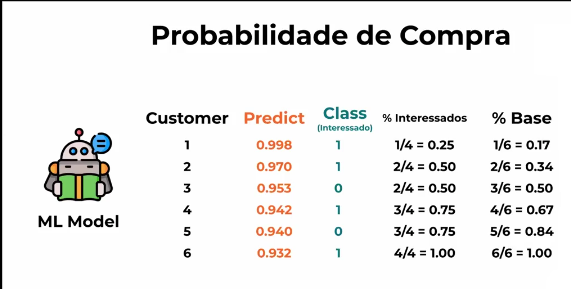

    O modelo vai apenas ordenar os customers de acordo com a probabilidade de compra
    
    Depois é necessário um modelo para o ranqueamento e a performance do ranqueamento vai se dar pela performance do modelo
    
    Base = qual a porcentagem dos interessados estão nas primeiras linhas ( quanto maior, melhor a performance )
    
    
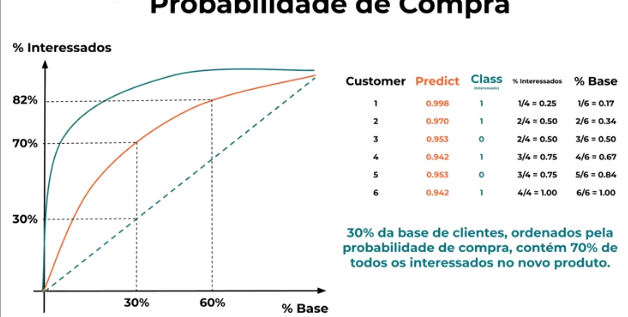  
    
    Curva de ganho 

    Com poucos dados a linha se torna uma 'escada' devido aos 'pulos' do eixo y
    
    Com muitos dados se torna uma curva
    
    Sem ordenar a coluna de clientes (deixar aleatório), a curva se torna reta(crescente)[pontilhada], 30% base = 30% interessados
        o modelo vai acertar mais do que a pontilhada, a diferença entre a pontilhada e a laranja é o lift (quanto seu modelo supera o aleatório)
     
     alternativas : aumentar a cobertura da base(+ ligações)[baseado no orçamento/capacidade instalada] , melhorar o modelo (última curva)

## **planejamento da solução**

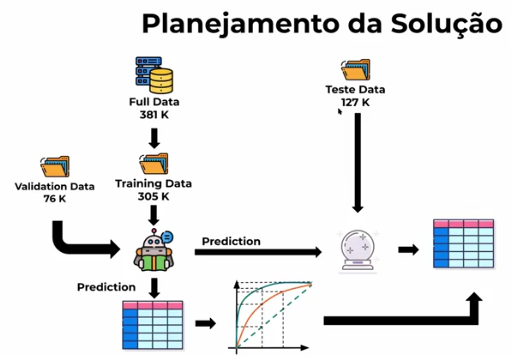
    
    20& de separação ( treino e validação )
    
    o test será feito requisição na api do kaggle
    
    com o treino cria-se o modelo e com a validação a capacidade de aprendizado
    
    o modelo vai criar a probabilidade de compra (prediction) [por ser dados de treino, terá a coluna de classe {interessados}], depois construir a curva de ganho
    
    test data (kaggle) será usado no modelo para criar a coluna prediction, mas agora sem a coluna de classe, depois usar a curva criada no treino para saber o impacto/retorno
    ñ é possível fazer uma nova curva pq vc n sabe quem vai se interessar ou não
    
    ! o modelo somente ordena a base [predict ordena os usuários] ! não há predict para os usuários novos
    
    a capacidade do modelo é colocar o maior número de pessoas que vai comprar no começo
    
    no mundo real, depois de ver quem comprou e quem não comprou, constrói-se a curva real (curva sobre o teste) [capacidade de ranqueamento do modelo para dados que ele nunca viu] == capacidade de generalização
    
    Treinamento + validação (+ cross validation) = capacidade de aprendizado do modelo
    Prever dados q o modelo nunca viu (test data) e depois calcular o erro = capacidade de generalização
    
    Capacidade de generalização é a métrica reportada ao time de negócio
    
    Erro do aprendizado < erro de teste = overfit (discrepância alta) [geralmente são parecidos]
    underfit = erro alto em ambos
    
    Dica para simular o ambiente de produção : no começo do projeto, separar 10-15% da full data como test data, depois separar entre treino e validação, fazer todos os passos, 
        e usar o test data para calcular uma suposta performance real do modelo. Depois juntar a full data com o test data, treinar novamente  e aplicar sobre o teste sem a variável resposta
        
        O modelo em produção sempre vai com todos os dados disponíveis (treino + teste)
        Na vida real, fazer o re-treino semanalmente para observar os resultados (fazer querys utilizando as datas)
        Eventualmente a performance degrada, então adicionar features ou trocar de modelo
        
    
       

# **live 017**

## **estruturas de projetos em data science**

# **live 018**

git checkout -b pa004_eduardo_rodrigues
ver python e git (ds em produção)
pyenv virtualenv 3.8.0 Pa004

2:57:53

**eda**   
    
**numéricas**

     age(20-65): boxplot, histplot [deu certo com scatterplot]
     
     annual premium(2630-540.165): boxplot, histplot
     
     driving license(0,1): barplot,  % [contingência deu certo]
     
     region code(0-52) : scatterplot [ficou ruim com boxplot e histplot]
     
     previously_insured(0-1): contingência [deu certo com barplot e %]
     
     policy_sales_channel(1-163): barplot
     
     vintage(10-299): boxplot, histplot
     
**categóricas**

    vehicle_age: value_counts%
     

    problemas de classificação : encontrar features que possibilitem 'cortes', divisórias claras entre pessoas interessadas ou não
    (regressão=encontrar variáveis que impactam a regressão, tipo correlações)
    
    remover outliers para não bagunçar o dataset
    
    3 ferramentas para olhar os dados: boxplot p/ comparar mediana, distribuições p/ variável numérica ou contínua, tabelas de contingência(frequência) 
    
    a eda é sempre feita com dados desbalanceado
    se for problemas naturalmente desbalanceados, pode balancear antes da eda (fraudes por ex [a grande maioria das transações é lícita)
    nesse caso do cross_sell, nao sabemos o caso do desbalanceamento (ex: número de respostas coletadas é total, se foram enviados 10k de email e 5k responderam)
    apesar de naturalmente a maioria das pessoas recusarem uma oferta, ñ é tão desbalanceado assim
    rodar o modelo com os dados desbalanceados (se ñ tiver uma natureza desbalanceada), se ficar muito ruim, balancear no segundo ciclo
    
    o balanceamento é uma tentativa de igualar as classes para aumentar a performance do modelo
    
    discussão sobre criar variáveis com a variável resposta no data preparation - até os 55 minutos (teoricamente pode usar a variável resposta no encoders categóricos mas não
    para criar novas features)
    
    sempre tem 3 datasets : teste = representação fiel dos dados de produção, validação = testar o aprendizado do modelo, 
    depois que o modelo aprende, treinar usando os dados de teste (simulação dos dados em produção), as métricas em cima do dado de teste representa
    a capacidade de generalização do modelo
    
    Na prática ás vezes n tem dados o bastante pra ter os 3 datasets, então acaba dividindo em dois, teste e treino, e mede-se o poder de generalização, não de aprendizado
    
    Não ter dataset de validação = impossibilidade de medir a diferença entre aprendizado e generalização para saber se overfitou (ótimas métricas de aprendizado
    e ruim de generalização)[o cross validation ajuda a investigar o overfitting]
    Caso ñ tenha o ds de validação, é necessário dividir os dois antes da padronização dos dados (se tiver os 3, pode dividir depois,pq vc vai ter métricas confiáveis
    sobre algo que o modelo nunca viu)
    Se vc quer o poder de generalização, divide em 3 ou em 2 antes da padronização (50-40 min pra acabar a live)
    Se for 2 = treino e teste, se for 3 = teste, validação e treino
    
    não esquecer da diferença entre classificar entre 'comprar' ou 'não comprar' pela probabilidade VS ordenar as pessoas numa lista baseado na chance de comprar
    na primeira a preocupação é saber se vai comprar ou não, na segunda é a ordenação da lista, esse problema faz a segunda
    então ñ é sobre o quão bom o modelo é mas sim no quão bom ele vai ordenar a lista
    é necessário utilizar métricas de ordenação e não de classificação
    
    testar pca/criar features

# **live 019**

## **ranking to learn**

    classification problem ≠ ranking problem

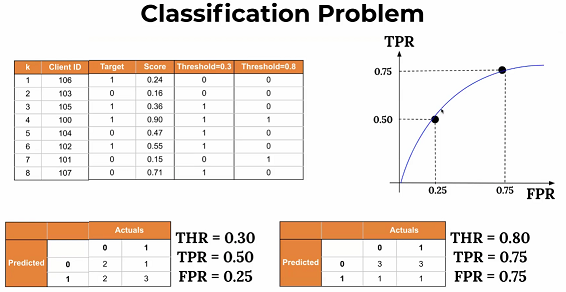

    pode usar porcentagens para melhor visualização
    
    métricas: thr(threshold)
    
              tpr(true positive rate)=taxa dos acertos da classe true/verdadeira, o quanto o valor real em relação ao valor predito representa em todos os valores reais
              2 / 2+2 = 0.50
              
              fpr(false positive rate)=quanto errou na classe negativa
              1 / 1+3 = 0.25
              
    Possibilidade de favorecer um tipo de erro em relação ao outro, em alguns problemas de negócio ñ importa errar mais ou menos uma classe,
        então deve se escolher um thr que tenha um balanço entre ambos
        Churning (acertar todo mundo q vai entrar em churning) precisão é importante, e recall(doenças) favorecer uma classe
        

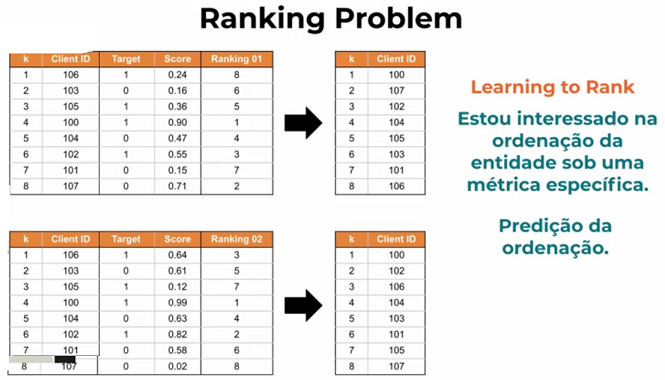

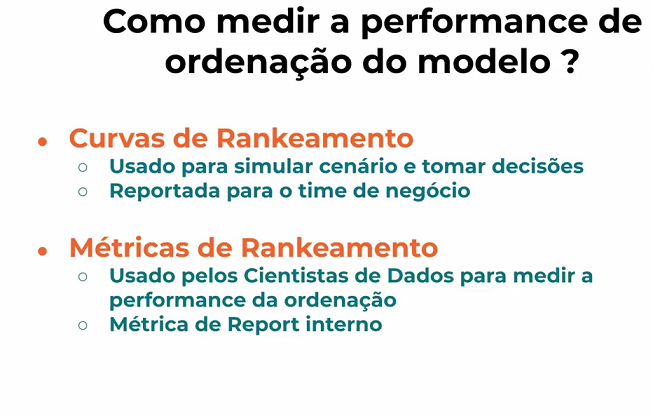

    propensity score serve exclusivamente p/ ordenar a base

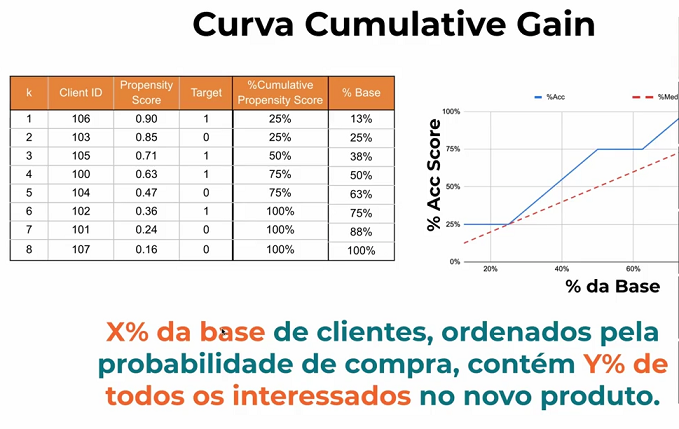

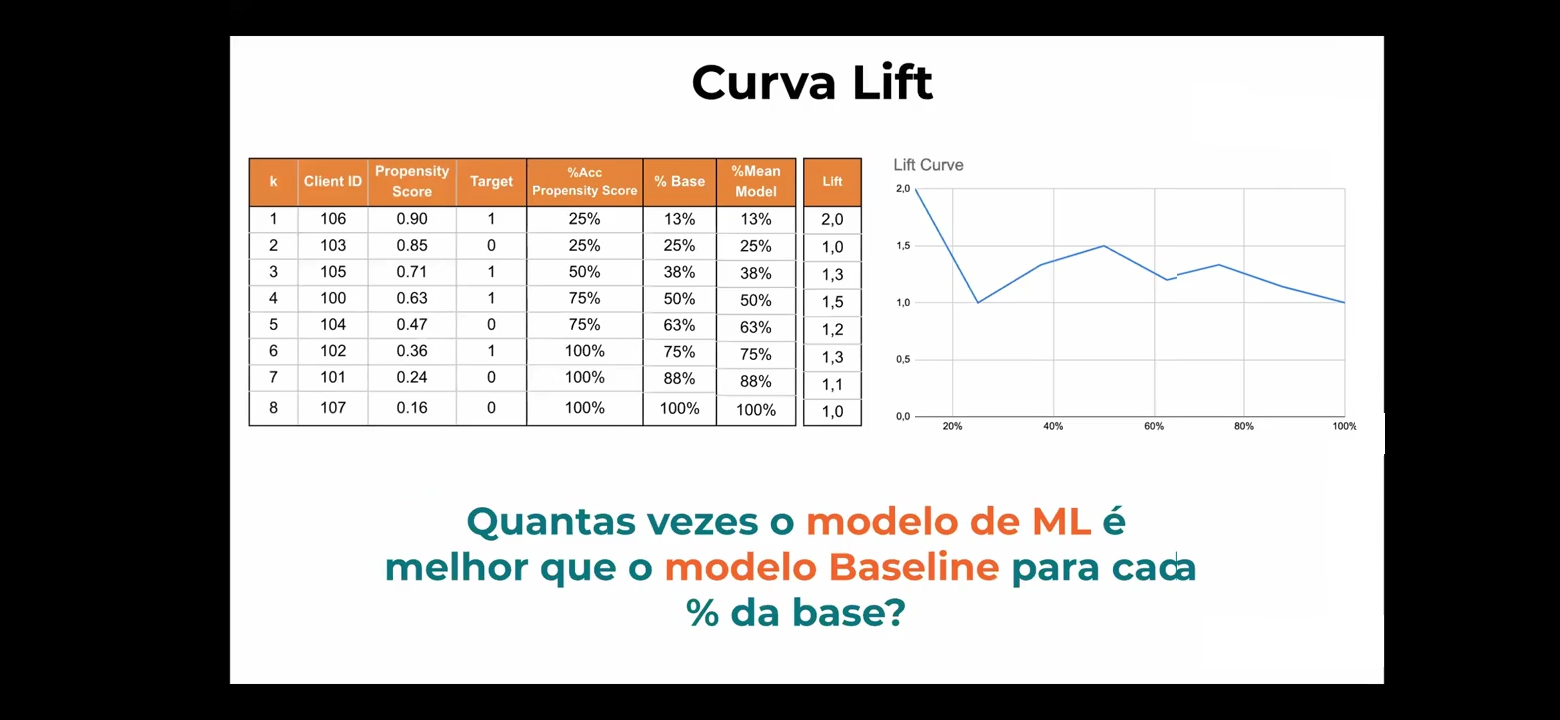

    o final da curva lift decai pq o seu modelo e o aleatório começam a convergir perto dos 100% no final, então a diferença é pequena

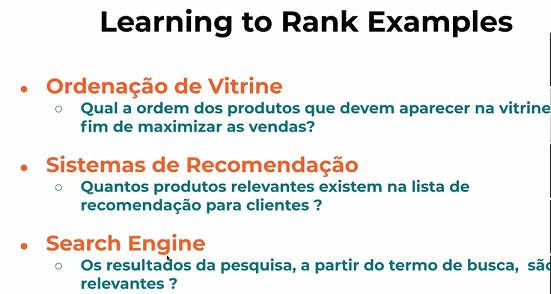

    vitrine = quando não há informação sobre o comportamento da pessoa, primeiro acesso 
    sistema de recomendação = email com recomendação de produtos baseado no seu comportamento de busca
    search engine e vitrine são um tipo de sistema de recomendação, para o time de negócio os três são diferentes

                                                         Métricas de ranking

    precision diz respeito à precisão do modelo, o quanto ele acerta sobre o q previu
    
    = até q número será estipulado para fazer a ordenação
    o k é dado pela restrição de negócio
    
    o único utilizado na prática é a precisão, o recall de vez em quando

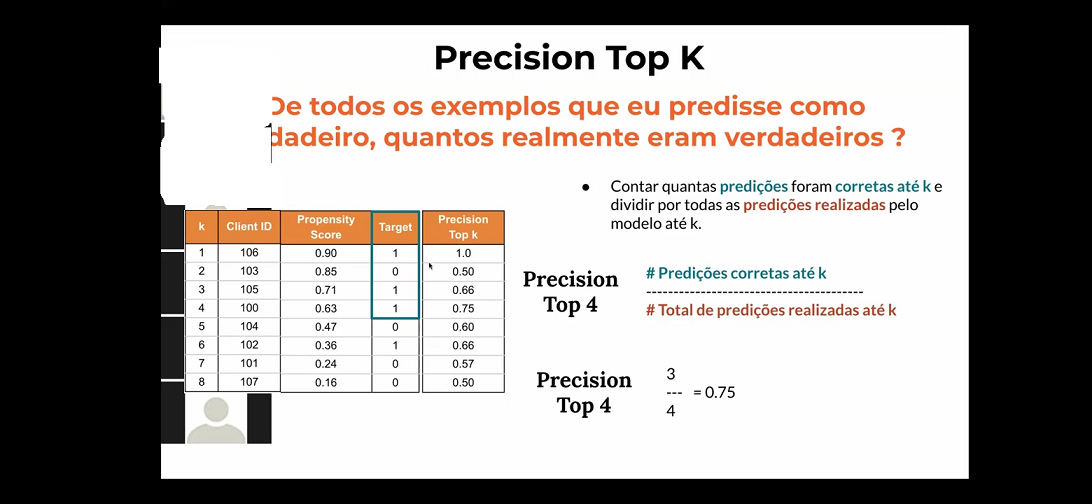

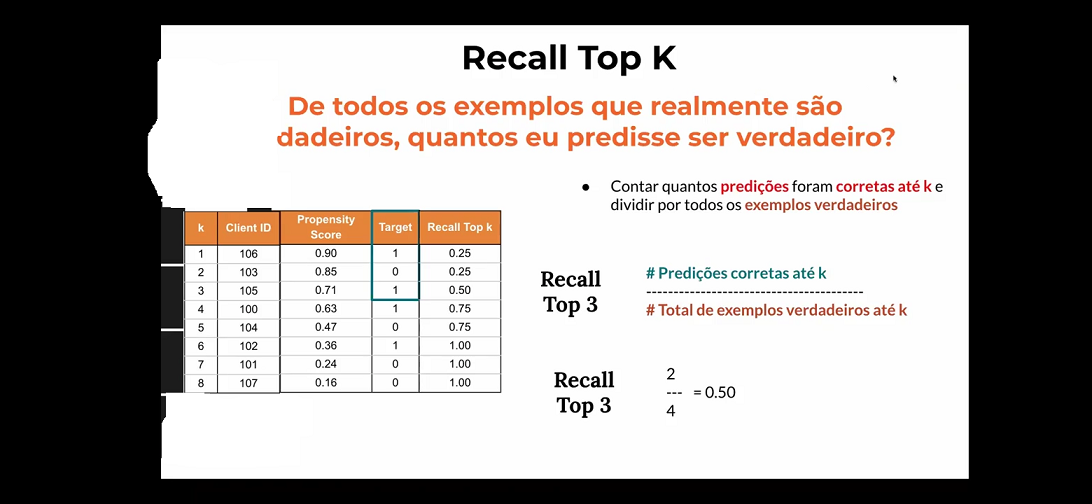

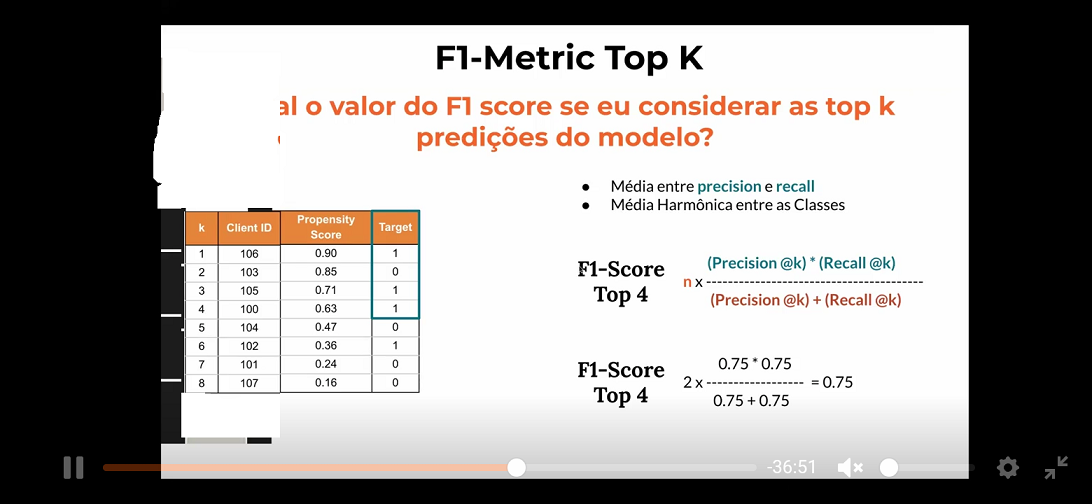

# **live 020**

## **O funcionamento da random forest**

### **o dilema do viés e da variância**

    O erro (predito - real) é composto de três partes (são resultados de uma prova matemática) : 
        
        Erro intrínseco do problema: erro q n pode ser controlado, é a falta de de variáveis para modelar o fenômeno
            (esse erro é somado ao segundo erro)
        
        Erro bias: erro devido à falta de flexibilização do modelo
        
        Variância: erro devido à deficiência do modelo em generalizar dados nunca vistos

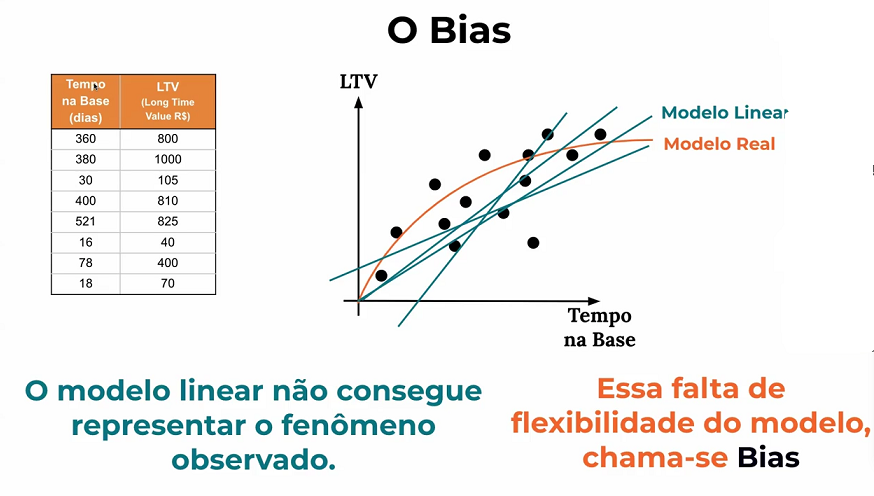

    a curva laranja é o fenômeno gerador
    
    modelo linear nao consegue representar o fenômeno muito bem pois tem um alto bias
    é o modelo com o mais alto bias
    

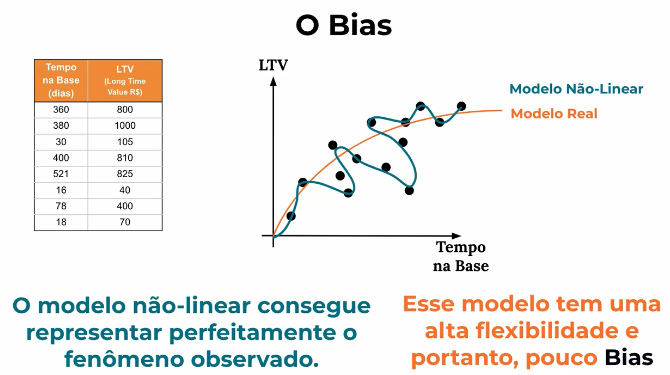

    um exemplo disso é uma regressão polinomial de grau 5 ou maior

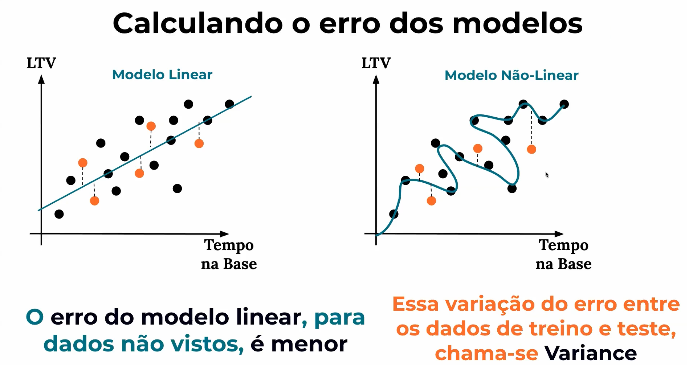

    pontos pretos = treinamento
    
    pontos laranjas = dados de teste para simular o modelo em produção e calcular a capacidade de generalização
    a soma desses erros ao quadrado(positivos e negativos) é o erro do modelo ao tentar fitar esse fenômeno
    
    modelo não linear fitou os dados de treino (decorou) por isso acaba se distanciando muito de alguns pontos do teste (dados q ele nunca viu)
    
    o erro precisa ser o mais constante possível para dados conhecidos e desconhecidos
    
    overfitting = baixo bias causando flexibilidade em excesso (decorou os dados)

**como conseguir um modelo com baixo viés e variância**

    modelos de ml = algoritmos que fazem cortes no espaço de dados, cada algoritmo faz um tipo de corte

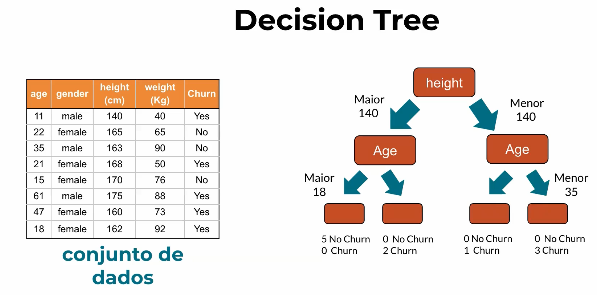

    cada 'quebra' da decision tree gera uma 'folha'
    o objetivo é encontrar uma folha pura/baixa entropia (contendo apenas uma classe)
        pureza = método de ginny e entropia= método de entropy, ambas medem até quando a árvore vai crescer
    
    critérios de parada mais usados : encontrar a pureza ou valor mínimo de elementos de determinada classe numa folha, ex: 2 no churn e 1 no churn ou 2 no churn

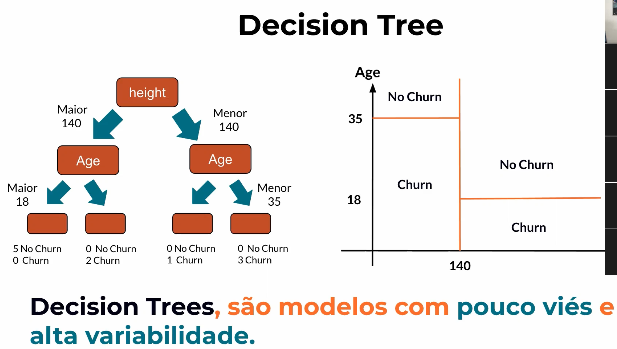

    * erro , 1 No Churn e 0 Churn

    cortes perpendiculares ao seu atributo original e paralelos aos eixos do espaço
    cada corte é uma região de classificação/regressão
    com mais cortes viraria um cubo na terceira dimensão e na quarta dimensão uma figura nao visualizável

    rede neural com neurônios em excesso overfita por ficar mto flexível

**como diminuir a variância da decision tree**

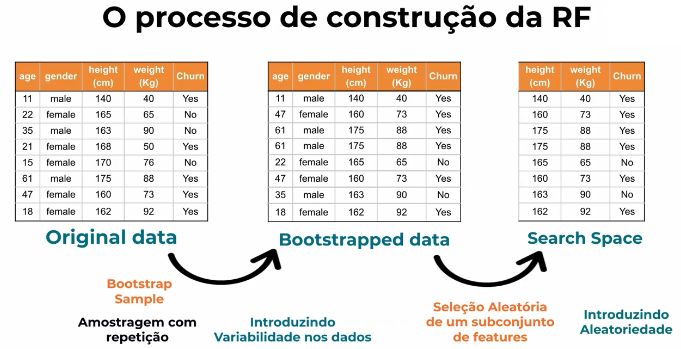

    bootstrap(baggin) sample (amostragem por reposição) para cada árvore criada aprender um aspecto diferente do dataset
    a repetição da amostragem por reposição serve para remover o limite de aprendizado/datasets possíveis a serem criados 
    
    seleção aleatória de um subconjunto de features p/ o algoritmo nao 'viciar' nas features muito relevantes

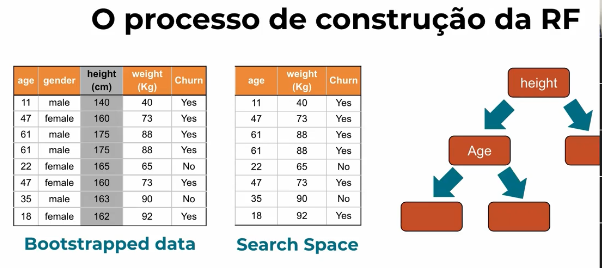

    depois da primeira quebra por height, nova seleção aleatória de features usando age, e assim por diante

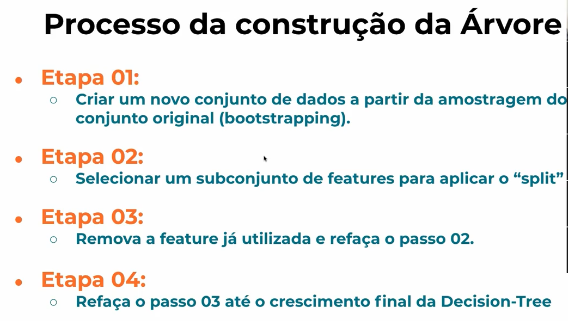

    etapa 2 evita o 'vício' em features, sorteio de features que serão usadas (criação de feature space)
    
    são criadas várias árvores, processo de paralelização (njobs -1) , cria árvores separadamente
    uma árvore para cada amostra de bootstrap

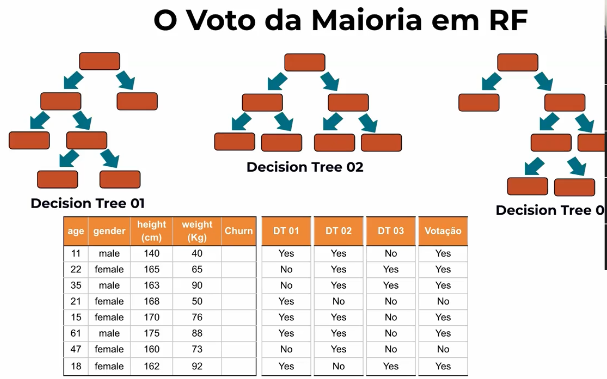

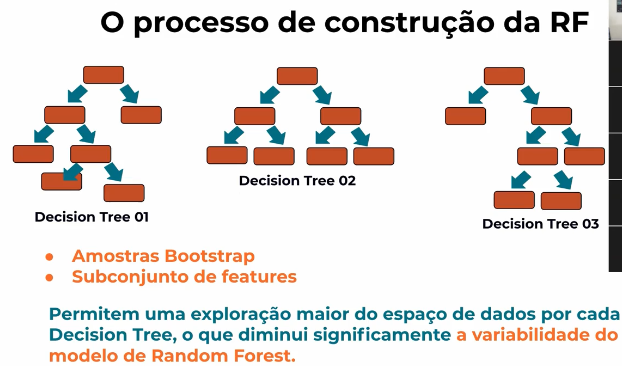

**características da random forest**

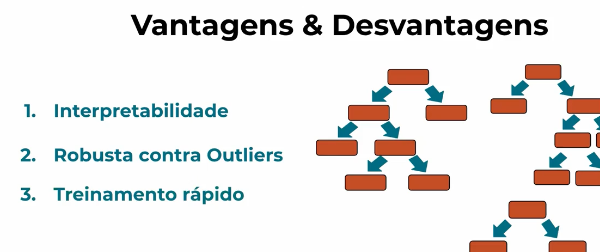

    desvantangens:
        overfita rápido se deixar as árvores crescendo muito
        pode dar muita importância p/ variável categória com alta cardinalidade (coluna com mtas cores por ex)

**parâmetros para otimizar**

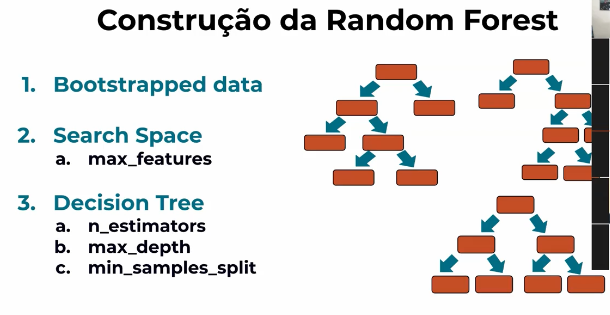

    bootstrap = randomstate, deixar aleatório p/ criar a maior variabilidade no bootstrap possível, depois setar um valor fixo com o resultado final
    
    n_estimators = quantidade de árvores, quanto mais árvores, maior a pesquisa no espaço de dados em busca de opiniões p/ votação
        ñ adianta aumentar mto o número de árvores se a variabilidade no bootstrap for pequena (ex feature idade de 18 a 20)
            amostra do bootstrap é igual ao tamanho da amostra original (ds de 20 linhas, boot de 20 linhas)
    
    max_depth = profundidade da árvore, quanto mais elementos na folha, menor a profundidade, consequentemente menos cortes no espaço e menos bias
        quanto menor n° elementos na folha, mais a árvore cresce, mais cortes no espaço, mais flexibilidade, menos bias, mas perigo de overfit e variância no teste
        
    min_samples_split = quantidade mínima de amostras para q a árvore teste uma feature pra fazer a quebra, ajuda a controlar o crescimento da árvore
           

# **live 021**

## **orientação a objeto p/ ciência de dados**

**-baseado na utilização de objetos para modelar o mundo real**

**-fortemente relacionada à organização dos códigos e entidades**

    O nome da classe é sempre camel case
    Métodos(funções)
        Variáveis de classe(variáveis) self.  indica que a variável pertence à classe 
    Def init = função construtora: ao instanciar (copiar) a classe, é sempre a primeira função a rodar
    
    Dois tipos de métodos, setters e os getters
    Setters : métodos q modificam variáveis dentro da classe (tem o underscore na frente ex def _set)
    Geters : métodos q recuperam variáveis 

# **live 023**

    possibilidade de fazer o fine tuning dentro do cross validation 
    
    depois do fine tuning, juntar treino e validação e treinar o modelo em cima de todos os dados
    depois usar o teste e aferir a métrica, e em cima desse resultado, extrair os ganhos financeiros 
    
    os dados de teste são usados para o retreino uma semana após entrar em produção, junto com os novos dados